Homework: Convolution Neural Networks
Assignment Description: 
In this assignment you will be working with a dataset provided by keras called CIFAR-100. 
It is very similar to the previous homework's dataset however it contains 100 classes in 20 groups which can be found here. The dataset can be imported into your new notebook like this:

In [35]:
import keras 
from keras.datasets import cifar100
from keras import models
from keras.models import Sequential 
from keras.utils import to_categorical
from keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, InputLayer, Dense #NEW
from matplotlib import pyplot as plt
import numpy as np
import itertools


(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
labels = np.loadtxt("cifar100labels.txt", delimiter=',',dtype=str)



x_train=x_train.reshape(50000, 32,32,3).astype('float32')
x_test=x_test.reshape(10000, 32,32,3).astype('float32')

x_train /= 255.0
x_test  /= 255.0

n_classes = 100 

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)


*CNN* architecture


In [36]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',padding = 'same', input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding = 'same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(128, kernel_size=3, activation = 'relu', padding = 'same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Dense(100, activation = 'relu'))
model.add(Flatten())

#model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       18560     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 128)        

**Configure** Model

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train

In [38]:
history = model.fit(x_train, y_train, batch_size=128, epochs=25 ,verbose=1,validation_data=(x_test,y_test))
test_loss, test_acc = model.evaluate(x_test,y_test)
print("test accuracy: ", test_acc)

Epoch 1/25
391/391 [==============================] - 7s 15ms/step - loss: 4.0075 - accuracy: 0.0915 - val_loss: 3.4305 - val_accuracy: 0.1838
Epoch 2/25
391/391 [==============================] - 6s 14ms/step - loss: 3.1652 - accuracy: 0.2342 - val_loss: 2.9132 - val_accuracy: 0.2896
Epoch 3/25
391/391 [==============================] - 6s 15ms/step - loss: 2.7633 - accuracy: 0.3118 - val_loss: 2.6401 - val_accuracy: 0.3424
Epoch 4/25
391/391 [==============================] - 6s 15ms/step - loss: 2.4862 - accuracy: 0.3678 - val_loss: 2.5064 - val_accuracy: 0.3705
Epoch 5/25
391/391 [==============================] - 6s 14ms/step - loss: 2.2807 - accuracy: 0.4132 - val_loss: 2.4519 - val_accuracy: 0.3841
Epoch 6/25
391/391 [==============================] - 6s 14ms/step - loss: 2.1048 - accuracy: 0.4476 - val_loss: 2.3609 - val_accuracy: 0.3986
Epoch 7/25
391/391 [==============================] - 6s 15ms/step - loss: 1.9549 - accuracy: 0.4832 - val_loss: 2.2585 - val_accuracy: 0.4260

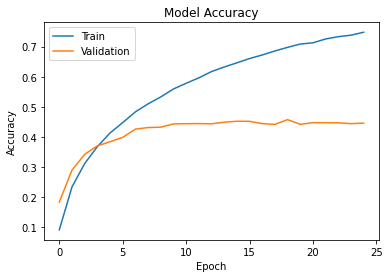

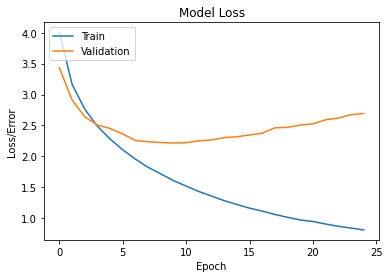

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

["'apple'" " 'aquarium_fish'" " 'baby'" " 'bear'" " 'beaver'" " 'bed'"
 " 'bee'" " 'beetle'" " 'bicycle'" " 'bottle'" " 'bowl'" " 'boy'"
 " 'bridge'" " 'bus'" " 'butterfly'" " 'camel'" " 'can'" " 'castle'"
 " 'caterpillar'" " 'cattle'" " 'chair'" " 'chimpanzee'" " 'clock'"
 " 'cloud'" " 'cockroach'" " 'couch'" " 'crab'" " 'crocodile'" " 'cup'"
 " 'dinosaur'" " 'dolphin'" " 'elephant'" " 'flatfish'" " 'forest'"
 " 'fox'" " 'girl'" " 'hamster'" " 'house'" " 'kangaroo'"
 " 'computer_keyboard'" " 'lamp'" " 'lawn_mower'" " 'leopard'" " 'lion'"
 " 'lizard'" " 'lobster'" " 'man'" " 'maple_tree'" " 'motorcycle'"
 " 'mountain'" " 'mouse'" " 'mushroom'" " 'oak_tree'" " 'orange'"
 " 'orchid'" " 'otter'" " 'palm_tree'" " 'pear'" " 'pickup_truck'"
 " 'pine_tree'" " 'plain'" " 'plate'" " 'poppy'" " 'porcupine'"
 " 'possum'" " 'rabbit'" " 'raccoon'" " 'ray'" " 'road'" " 'rocket'"
 " 'rose'" " 'sea'" " 'seal'" " 'shark'" " 'shrew'" "'skunk'"
 "'skyscraper'" "'snail'" "'snake'" "'spider'" "'squirrel'" 

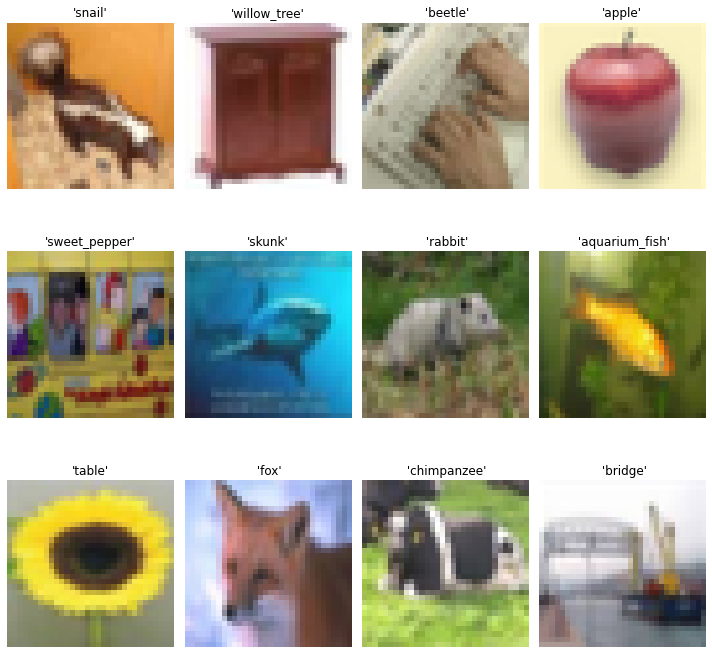

In [42]:
import random
print(labels)


plt.figure(figsize=(10,10))
for k in np.arange(0,12):
    plt.subplot(3,4, k+1)
    im = random.randint(1,10000)
    plt.imshow(x_test[im], cmap='Greys')
    image=x_test[im].reshape(1,32,32,3).astype('float32')
    predict = model.predict(image)
    predict = to_categorical(np.argmax(predict, 1), dtype = "int64")
    classes = str(predict)
    predict = classes.split(' ')
    n = len(predict)
    classes = labels
    result=classes[n-1]
    plt.axis('off')
    plt.title(result)
plt.tight_layout()
plt.show()
